### *"The ones who are crazy enough to think they can change the world are the ones who do."*
*-Steve Jobs*

Be the change, folks.  Be the change. You can and you will.

----

### YOUR NAME HERE:  Travis Kerr

#### List the names of anyone you helped here: Brendan, Evan, Alanna

#### List the names of anyone who helped you here: Brendan, Evan
----

# HW: Subqueries

**Be sure to use your SQL cheat sheet to help you in this homework!**

In this homework, we focus on subqueries and transitioning to creating plots.  We review some old topics as well, like filtering and GROUP BY.

---

## Connect to the SQLite DB

Remember: To use SQLite, we need to import some special packages.  So please run the cell below!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3 as sql

# Installing a special formatting package
import sys
!{sys.executable} -m pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Let's bring in some weather data for the first portion of this lab.

The ```weather``` database has a single table (simply called the ```weather``` table) that contains about 62 years worth of temperature, rainfall and sunshine data for the city of London.

Notice the UNITS of the data.

* year: the year of the recorded information
* month: the month of the recorded information
* t_high:  The highest temp recorded for the month (**celsius**)
* t_low:  The lowest temp recorded for the month (**celsius**)
* rain: the rainfall is the total amout of rain for the month in **millimeters**
* sun : the total number of **hours** sunshine for the month.

In [ ]:
#Try to make a connection to a database file ('weather.db'). 
#If anything goes wrong, print an error message.

try:
    conn = sql.connect('weather.db')
except ValueError: 
    print("""Dr. R Note: A ValueError occurred:\n\t""" + ValueError )

The weather table table contains about 62 years worth of temperature, rainfall and sunshine data for the city of London.

There is a record/row for each year/month from Jan 1957 to April 2019.  

* t_high:  The highest temp recorded for the month (celsius)
* t_low:  The lowest temp recorded for the month (celsius)
* rain: the rainfall is the total amout of rain for the month in millimeters
* sun : the total number of hours sunshine for the month.

In [ ]:
sql_statement = """SELECT * 
                   FROM weather"""

weather_results = pd.read_sql_query(sql_statement, conn)
weather_results

,year,month,t_high,t_low,rain,sun
0,1957,1,8.7,2.7,39.5,53.0
1,1957,2,9.0,2.9,69.8,64.9
2,1957,3,13.9,5.7,25.4,96.7
3,1957,4,14.2,5.2,5.7,169.6
4,1957,5,16.2,6.5,21.3,195.0
...,...,...,...,...,...,...
743,2018,12,10.7,5.2,60.6,40.3
744,2019,1,7.6,2.0,33.2,56.4
745,2019,2,12.4,3.3,34.2,120.2
746,2019,3,13.1,5.8,49.6,119.0


---

# QUESTION 1

You were told that the weather table table contains 63 years worth of temperature.  

Write a query whose final output is 63, ie, that calculates the number of years worth of data.

In [ ]:
#Replace the ellipsis (...) with a SELECT statement.
sql_statement1 = """
                    SELECT COUNT(DISTINCT(year))
                    FROM weather
                 """

#Run the query and save the returned dataframe.
query_results1 = pd.read_sql_query(sql_statement1, conn)

#Print the dataframe results.
query_results1

,COUNT(DISTINCT(year))
0,63


---

# QUESTION 2

You were told that there is a record/row for each year/month from Jan 1957 to April 2019.  

Write a query to verify this, ie, list each year/month in the database exactly once in a sorted fashion.

In [ ]:
sql_statement2 = """
                    SELECT year, month
                    FROM weather
                 """

query_results2 = pd.read_sql_query(sql_statement2, conn)

query_results2

,year,month
0,1957,1
1,1957,2
2,1957,3
3,1957,4
4,1957,5
...,...,...
743,2018,12
744,2019,1
745,2019,2
746,2019,3


The table above was truncated (middle rows left out).  We can use python to fix that.  
Run the next cell to see.

In [ ]:
print(query_results2.to_markdown()) #This line of code looks complicated but it just
                                    #prints ALL rows without truncation so you can check your results.

|     |   year |   month |
|----:|-------:|--------:|
|   0 |   1957 |       1 |
|   1 |   1957 |       2 |
|   2 |   1957 |       3 |
|   3 |   1957 |       4 |
|   4 |   1957 |       5 |
|   5 |   1957 |       6 |
|   6 |   1957 |       7 |
|   7 |   1957 |       8 |
|   8 |   1957 |       9 |
|   9 |   1957 |      10 |
|  10 |   1957 |      11 |
|  11 |   1957 |      12 |
|  12 |   1958 |       1 |
|  13 |   1958 |       2 |
|  14 |   1958 |       3 |
|  15 |   1958 |       4 |
|  16 |   1958 |       5 |
|  17 |   1958 |       6 |
|  18 |   1958 |       7 |
|  19 |   1958 |       8 |
|  20 |   1958 |       9 |
|  21 |   1958 |      10 |
|  22 |   1958 |      11 |
|  23 |   1958 |      12 |
|  24 |   1959 |       1 |
|  25 |   1959 |       2 |
|  26 |   1959 |       3 |
|  27 |   1959 |       4 |
|  28 |   1959 |       5 |
|  29 |   1959 |       6 |
|  30 |   1959 |       7 |
|  31 |   1959 |       8 |
|  32 |   1959 |       9 |
|  33 |   1959 |      10 |
|  34 |   1959 |      11 |
|

---

# QUESTION 3

You have verified that there is a record/row for each year/month from Jan 1957 to April 2019.  

This meant you had to look at the long table above and verify 1-12 appeared for each year.

As another alternative, we could have analyzed the count of the months for each year. There should be 12 records for each year (one per month) and 4 for 2019.  

Write a query to show the number of rows per year.

Double-click __here__ to see what the solution looks like.

<!--

|    |   year |   num_months_in_db |
|---:|-------:|-------------------:|
|  0 |   1957 |                 12 |
|  1 |   1958 |                 12 |
|  2 |   1959 |                 12 |
|  3 |   1960 |                 12 |
|  4 |   1961 |                 12 |
|  5 |   1962 |                 12 |
|  6 |   1963 |                 12 |
|  7 |   1964 |                 12 |
|  8 |   1965 |                 12 |
|  9 |   1966 |                 12 |
| 10 |   1967 |                 12 |
| 11 |   1968 |                 12 |
| 12 |   1969 |                 12 |
| 13 |   1970 |                 12 |
| 14 |   1971 |                 12 |
| 15 |   1972 |                 12 |
| 16 |   1973 |                 12 |
| 17 |   1974 |                 12 |
| 18 |   1975 |                 12 |
| 19 |   1976 |                 12 |
| 20 |   1977 |                 12 |
| 21 |   1978 |                 12 |
| 22 |   1979 |                 12 |
| 23 |   1980 |                 12 |
| 24 |   1981 |                 12 |
| 25 |   1982 |                 12 |
| 26 |   1983 |                 12 |
| 27 |   1984 |                 12 |
| 28 |   1985 |                 12 |
| 29 |   1986 |                 12 |
| 30 |   1987 |                 12 |
| 31 |   1988 |                 12 |
| 32 |   1989 |                 12 |
| 33 |   1990 |                 12 |
| 34 |   1991 |                 12 |
| 35 |   1992 |                 12 |
| 36 |   1993 |                 12 |
| 37 |   1994 |                 12 |
| 38 |   1995 |                 12 |
| 39 |   1996 |                 12 |
| 40 |   1997 |                 12 |
| 41 |   1998 |                 12 |
| 42 |   1999 |                 12 |
| 43 |   2000 |                 12 |
| 44 |   2001 |                 12 |
| 45 |   2002 |                 12 |
| 46 |   2003 |                 12 |
| 47 |   2004 |                 12 |
| 48 |   2005 |                 12 |
| 49 |   2006 |                 12 |
| 50 |   2007 |                 12 |
| 51 |   2008 |                 12 |
| 52 |   2009 |                 12 |
| 53 |   2010 |                 12 |
| 54 |   2011 |                 12 |
| 55 |   2012 |                 12 |
| 56 |   2013 |                 12 |
| 57 |   2014 |                 12 |
| 58 |   2015 |                 12 |
| 59 |   2016 |                 12 |
| 60 |   2017 |                 12 |
| 61 |   2018 |                 12 |
| 62 |   2019 |                  4 |
-->

In [ ]:
sql_statement3 = """
                    SELECT year, COUNT(*) AS num_months_in_db
                    FROM weather
                    GROUP BY year
                 """

query_results3 = pd.read_sql_query(sql_statement3, conn)

print(query_results3.to_markdown())  #The print will allow is to see all rows with no truncation.

|    |   year |   num_months_in_db |
|---:|-------:|-------------------:|
|  0 |   1957 |                 12 |
|  1 |   1958 |                 12 |
|  2 |   1959 |                 12 |
|  3 |   1960 |                 12 |
|  4 |   1961 |                 12 |
|  5 |   1962 |                 12 |
|  6 |   1963 |                 12 |
|  7 |   1964 |                 12 |
|  8 |   1965 |                 12 |
|  9 |   1966 |                 12 |
| 10 |   1967 |                 12 |
| 11 |   1968 |                 12 |
| 12 |   1969 |                 12 |
| 13 |   1970 |                 12 |
| 14 |   1971 |                 12 |
| 15 |   1972 |                 12 |
| 16 |   1973 |                 12 |
| 17 |   1974 |                 12 |
| 18 |   1975 |                 12 |
| 19 |   1976 |                 12 |
| 20 |   1977 |                 12 |
| 21 |   1978 |                 12 |
| 22 |   1979 |                 12 |
| 23 |   1980 |                 12 |
| 24 |   1981 |                 12 |
|

---

# DEMONSTRATION

We will begin to mix SQL queries with Python plotting so that we can visualize the data and thus better learn from it.

To give you a taste of this, in this question, I will help you graph the max and the min temperatures for each month in the DB.

### First Step - Use SQL to get the desired data for the plot

First, we'll just select all data from the database, so run the next cell.

In [ ]:
sql_statement = """SELECT * FROM weather"""

weather_results = pd.read_sql_query(sql_statement, conn)
weather_results

,year,month,t_high,t_low,rain,sun
0,1957,1,8.7,2.7,39.5,53.0
1,1957,2,9.0,2.9,69.8,64.9
2,1957,3,13.9,5.7,25.4,96.7
3,1957,4,14.2,5.2,5.7,169.6
4,1957,5,16.2,6.5,21.3,195.0
...,...,...,...,...,...,...
743,2018,12,10.7,5.2,60.6,40.3
744,2019,1,7.6,2.0,33.2,56.4
745,2019,2,12.4,3.3,34.2,120.2
746,2019,3,13.1,5.8,49.6,119.0


### Second Step - Transform the data as needed with Python

Second, I will create combine the year and month columns into a date format that python can recongnize when analyzing dates.

Run the next cell and notice that I have added a "date" column as the last column in our dataframe.

In [ ]:
#CODE CELL A
#This code creates a date column our of the year and month columns in the weather_results dataframe.
weather_results['date'] = pd.to_datetime(dict(year=weather_results["year"], month=weather_results["month"], day=1)) #We're setting the day to be 1 
                                                                                                                    #for each record since we don't 
                                                                                                                    #have a day in our database.
weather_results

,year,month,t_high,t_low,rain,sun,date
0,1957,1,8.7,2.7,39.5,53.0,1957-01-01
1,1957,2,9.0,2.9,69.8,64.9,1957-02-01
2,1957,3,13.9,5.7,25.4,96.7,1957-03-01
3,1957,4,14.2,5.2,5.7,169.6,1957-04-01
4,1957,5,16.2,6.5,21.3,195.0,1957-05-01
...,...,...,...,...,...,...,...
743,2018,12,10.7,5.2,60.6,40.3,2018-12-01
744,2019,1,7.6,2.0,33.2,56.4,2019-01-01
745,2019,2,12.4,3.3,34.2,120.2,2019-02-01
746,2019,3,13.1,5.8,49.6,119.0,2019-03-01


### Third Step - Plot!

Now I will plot the max and min temperatures for each month in our database

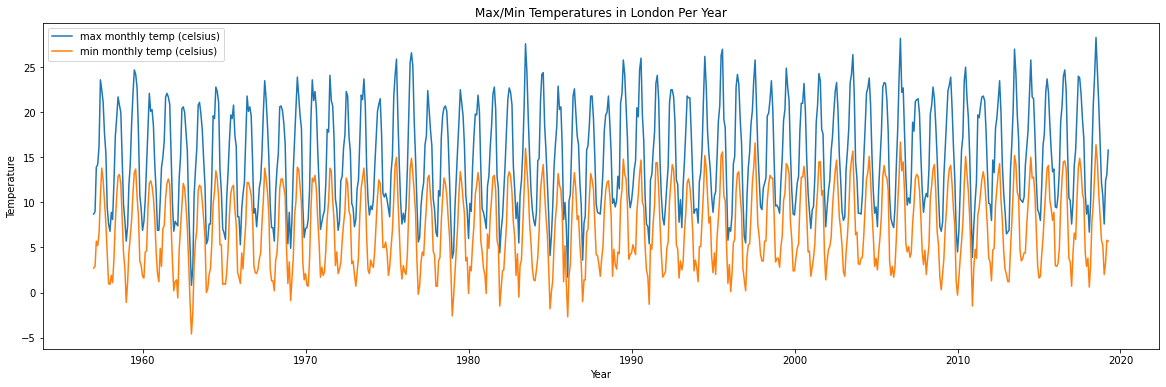

In [ ]:
#CODE CELL B
#This code creates a date column our of the year and month columns in the weather_results dataframe.
plt.figure(figsize=(20,6))
plt.plot(weather_results["date"], weather_results["t_high"], label="max monthly temp (celsius)")
plt.plot(weather_results["date"], weather_results["t_low"], label="min monthly temp (celsius)")
plt.title('Max/Min Temperatures in London Per Year')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()

We see that the highs/lows seem to fluctute in a similar pattern from year to year, which makes sense.  

We might be able to make more sense of this if the temperatures were in Fahreneheit so that leads to the next question.

---

# QUESTION 4

A) To convert a celsius temp to a fahrenheit temp, we use this equation:

$$(celsius × 9/5) + 32 = fahrenheit$$

In the cell below, use SQL to generate a table of the year, month, t_high in fahrenheit and t_low in fahrenheit.  

Call the cols as such: t_high_degrees_f,  t_low_degrees_f

**Notice that we save the results into a dataframe called ```celsius_results```.**
                                                                                                 

In [ ]:
    
sql_statement = """
                    SELECT year, month, (t_high*9/5) + 32 AS t_high_degrees_f, (t_low*9/5) + 32 AS t_low_degrees_f
                    FROM weather
                  
                """

celsius_results = pd.read_sql_query(sql_statement, conn)
celsius_results

,year,month,t_high_degrees_f,t_low_degrees_f
0,1957,1,47.66,36.86
1,1957,2,48.20,37.22
2,1957,3,57.02,42.26
3,1957,4,57.56,41.36
4,1957,5,61.16,43.70
...,...,...,...,...
743,2018,12,51.26,41.36
744,2019,1,45.68,35.60
745,2019,2,54.32,37.94
746,2019,3,55.58,42.44


B) As in the above example, we need to create a a date column from the month and year columns to help Python make a plot.  

Copy and paste code cell A in the second step from the previous example.

You'll have to replace  ```weather_results``` with ```celsius_results``` since that is the name of our new dataframe.

Double-click __here__ to see what the solution looks like.

<!--

|     |   year |   month |   t_high_degrees_f |   t_low_degrees_f | date                |
|----:|-------:|--------:|-------------------:|------------------:|:--------------------|
|   0 |   1957 |       1 |              47.66 |             36.86 | 1957-01-01 00:00:00 |
|   1 |   1957 |       2 |              48.2  |             37.22 | 1957-02-01 00:00:00 |
|   2 |   1957 |       3 |              57.02 |             42.26 | 1957-03-01 00:00:00 |
|   3 |   1957 |       4 |              57.56 |             41.36 | 1957-04-01 00:00:00 |
|   4 |   1957 |       5 |              61.16 |             43.7  | 1957-05-01 00:00:00 |
|   5 |   1957 |       6 |              74.48 |             51.26 | 1957-06-01 00:00:00 |
|   6 |   1957 |       7 |              72.5  |             56.84 | 1957-07-01 00:00:00 |
|   7 |   1957 |       8 |              69.98 |             54.5  | 1957-08-01 00:00:00 |
|   8 |   1957 |       9 |              63.68 |             50.18 | 1957-09-01 00:00:00 |
|   9 |   1957 |      10 |              59.9  |             45.86 | 1957-10-01 00:00:00 |
|  10 |   1957 |      11 |              48.92 |             39.74 | 1957-11-01 00:00:00 |
|  11 |   1957 |      12 |              45.68 |             33.8  | 1957-12-01 00:00:00 |
|  12 |   1958 |       1 |              44.24 |             33.62 | 1958-01-01 00:00:00 |
|  13 |   1958 |       2 |              48.02 |             35.42 | 1958-02-01 00:00:00 |
|  14 |   1958 |       3 |              46.58 |             33.98 | 1958-03-01 00:00:00 |
|  15 |   1958 |       4 |              54.14 |             38.84 | 1958-04-01 00:00:00 |

...

| 725 |   2017 |       6 |              75.2  |             57.02 | 2017-06-01 00:00:00 |
| 726 |   2017 |       7 |              74.84 |             58.82 | 2017-07-01 00:00:00 |
| 727 |   2017 |       8 |              71.6  |             56.3  | 2017-08-01 00:00:00 |
| 728 |   2017 |       9 |              66.56 |             51.8  | 2017-09-01 00:00:00 |
| 729 |   2017 |      10 |              62.78 |             50.54 | 2017-10-01 00:00:00 |
| 730 |   2017 |      11 |              51.98 |             40.1  | 2017-11-01 00:00:00 |
| 731 |   2017 |      12 |              47.66 |             37.22 | 2017-12-01 00:00:00 |
| 732 |   2018 |       1 |              49.46 |             38.84 | 2018-01-01 00:00:00 |
| 733 |   2018 |       2 |              44.06 |             33.08 | 2018-02-01 00:00:00 |
| 734 |   2018 |       3 |              49.64 |             37.4  | 2018-03-01 00:00:00 |
| 735 |   2018 |       4 |              59.9  |             46.22 | 2018-04-01 00:00:00 |
| 736 |   2018 |       5 |              69.44 |             49.64 | 2018-05-01 00:00:00 |
| 737 |   2018 |       6 |              75.56 |             55.58 | 2018-06-01 00:00:00 |
| 738 |   2018 |       7 |              82.94 |             61.52 | 2018-07-01 00:00:00 |
| 739 |   2018 |       8 |              76.1  |             58.1  | 2018-08-01 00:00:00 |
| 740 |   2018 |       9 |              69.62 |             51.8  | 2018-09-01 00:00:00 |
| 741 |   2018 |      10 |              61.7  |             47.3  | 2018-10-01 00:00:00 |
| 742 |   2018 |      11 |              53.96 |             42.44 | 2018-11-01 00:00:00 |
| 743 |   2018 |      12 |              51.26 |             41.36 | 2018-12-01 00:00:00 |
| 744 |   2019 |       1 |              45.68 |             35.6  | 2019-01-01 00:00:00 |
| 745 |   2019 |       2 |              54.32 |             37.94 | 2019-02-01 00:00:00 |
| 746 |   2019 |       3 |              55.58 |             42.44 | 2019-03-01 00:00:00 |
| 747 |   2019 |       4 |              60.44 |             42.26 | 2019-04-01 00:00:00 |

-->

In [ ]:
#copy code from previous example into this code cell!
celsius_results['date'] = pd.to_datetime(dict(year=celsius_results["year"], month=celsius_results["month"], day=1)) #We're setting the day to be 1 

celsius_results

,year,month,t_high_degrees_f,t_low_degrees_f,date
0,1957,1,47.66,36.86,1957-01-01
1,1957,2,48.20,37.22,1957-02-01
2,1957,3,57.02,42.26,1957-03-01
3,1957,4,57.56,41.36,1957-04-01
4,1957,5,61.16,43.70,1957-05-01
...,...,...,...,...,...
743,2018,12,51.26,41.36,2018-12-01
744,2019,1,45.68,35.60,2019-01-01
745,2019,2,54.32,37.94,2019-02-01
746,2019,3,55.58,42.44,2019-03-01


B) Now copy and paste code cell B in the third step from the previous example into the code cell below.

You'll have to replace  ```weather_results``` with ```celsius_results``` again.

Also, instead of using the old column names, you'll have to reference our new column names: ```t_high_degrees_f``` and ```t_low_degrees_f```.

Finally, make sure your legend says ```fahreneheit``` instead of ```celsius```.

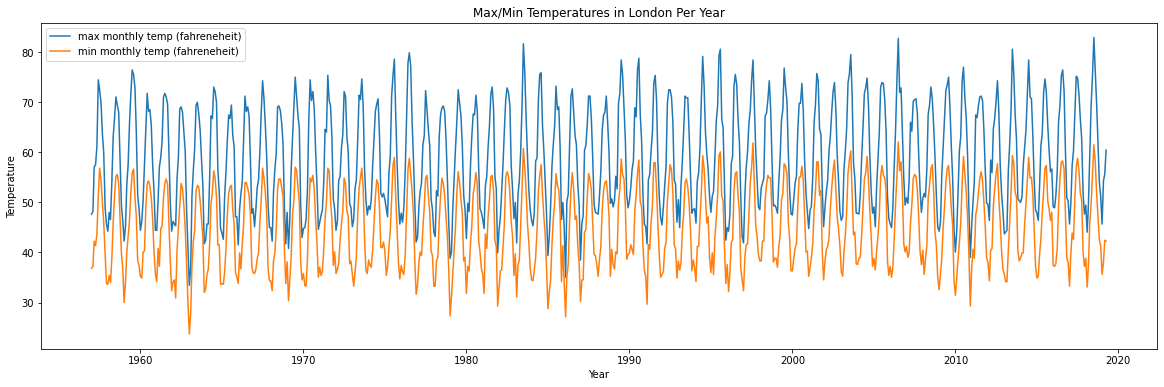

In [ ]:
#copy code from previous example into this code cell!
plt.figure(figsize=(20,6))
plt.plot(celsius_results["date"], celsius_results["t_high_degrees_f"], label="max monthly temp (fahreneheit)")
plt.plot(celsius_results["date"], celsius_results["t_low_degrees_f"], label="min monthly temp (fahreneheit)")
plt.title('Max/Min Temperatures in London Per Year')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()

### ANSWER:

If you did this right, your graph should look like the one at this link:
    
[Click here to see what the right answer looks like.](https://raw.githubusercontent.com/kathleen-ryan-DeSales/CS260/032e5762572bbe740c998092a098f0465624787f/Celsius-Answer.png)

### What do we learn?

We learn from the graph that the London temperatures seem to stay between about 20-80 degrees fahrenheit.

So the London temperatures are less extreme than that of the Phialdelphia/NYC region near DeSales.

---

# QUESTION 5

Let's practice the visualization process one more time.

A. Find the max temperatures during July for each year in the DB.  Only show the year and maximum temperature columns.

HINT:  You should get a 62 row X 2 column table.

In [ ]:
sql_statement = """
                SELECT year, t_high
                FROM weather
                WHERE month = 7
                """

july_results = pd.read_sql_query(sql_statement, conn)
july_results

,year,t_high
0,1957,22.5
1,1958,21.7
2,1959,24.7
3,1960,20.1
4,1961,22.1
...,...,...
57,2014,25.8
58,2015,23.7
59,2016,24.0
60,2017,23.8


B.  Use the examples from the demonstration and previous question to fill in ellipsis below.

Your code will create a line graph of the maximum temperatures in July.

Your answer when correct should look like the picture at this link:  

* [Click here for the answer](https://raw.githubusercontent.com/kathleen-ryan-DeSales/CS260/a1ad3f738da8792272f78bfc6843ee140872d559/July-graph.png)

Text(0, 0.5, 'Max Temp In July')

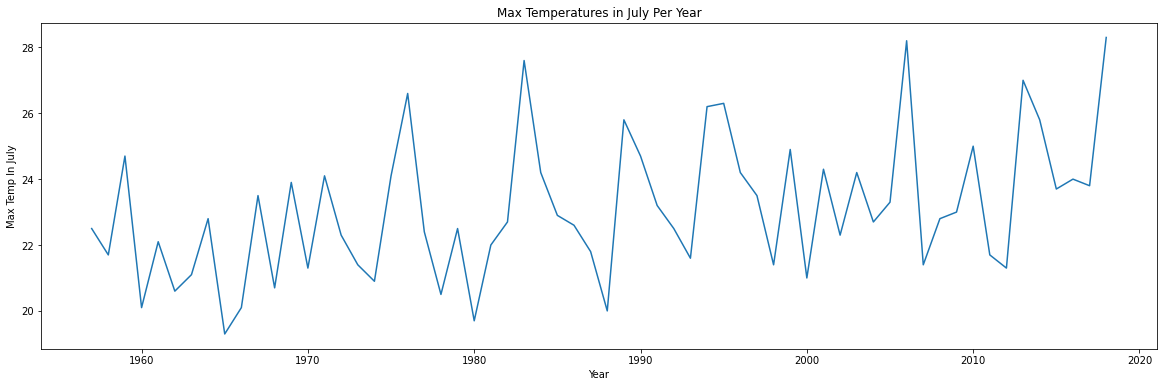

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(july_results["year"], july_results["t_high"], label="max monthly temp (fahreneheit)")
plt.title('Max Temperatures in July Per Year')
plt.xlabel('Year')
plt.ylabel('Max Temp In July')

C.  Write a sentence about what you learn from the graph.

*We can learn that the max temp is slightly increasing over the 60+ years.*

---

Now let's return to getting some SQL practice.

---
# QUESTION 6

Select all rows/columns where the highest temperature in the month was least 25 degrees celsius (which is 77 degrees F so we're expecting the warmer months).  

Double-click __here__ to see what the solution looks like.

<!--

|    |   year |   month |   t_high |   t_low |   rain |   sun |
|---:|-------:|--------:|---------:|--------:|-------:|------:|
|  0 |   1975 |       8 |     25.9 |    15   |   13.3 | 226   |
|  1 |   1976 |       6 |     25.5 |    13.7 |    6.3 | 261.2 |
|  2 |   1976 |       7 |     26.6 |    14.9 |   15.4 | 263.5 |
|  3 |   1976 |       8 |     25.1 |    13.2 |   16.4 | 263.7 |
|  4 |   1983 |       7 |     27.6 |    16   |   50.3 | 247.8 |
|  5 |   1989 |       7 |     25.8 |    14.8 |   36.7 | 274.8 |
|  6 |   1990 |       8 |     26   |    14.7 |   26.8 | 249.3 |
|  7 |   1994 |       7 |     26.2 |    15.2 |   16.9 | 267.1 |
|  8 |   1995 |       7 |     26.3 |    15.2 |   20.3 | 247.1 |
|  9 |   1995 |       8 |     27   |    15.6 |    0.3 | 295.3 |
| 10 |   1997 |       8 |     25.8 |    16.6 |   70.5 | 194.2 |
| 11 |   2003 |       8 |     26.4 |    15.7 |   10.4 | 255.3 |
| 12 |   2006 |       7 |     28.2 |    16.7 |   23.6 | 266.4 |
| 13 |   2010 |       7 |     25   |    15.1 |   18   | 161.8 |
| 14 |   2013 |       7 |     27   |    15.2 |   25.2 | 268.2 |
| 15 |   2014 |       7 |     25.8 |    15   |   50   | 246.4 |
| 16 |   2018 |       7 |     28.3 |    16.4 |   14.8 | 272.5 |

-->

In [ ]:
sql_statement6 = """
                    SELECT year, month, t_high, t_low, rain, sun
                    FROM weather
                    WHERE t_high >= 25
                 """

query_results6 = pd.read_sql_query(sql_statement6, conn)

query_results6

,year,month,t_high,t_low,rain,sun
0,1975,8,25.9,15.0,13.3,226.0
1,1976,6,25.5,13.7,6.3,261.2
2,1976,7,26.6,14.9,15.4,263.5
3,1976,8,25.1,13.2,16.4,263.7
4,1983,7,27.6,16.0,50.3,247.8
5,1989,7,25.8,14.8,36.7,274.8
6,1990,8,26.0,14.7,26.8,249.3
7,1994,7,26.2,15.2,16.9,267.1
8,1995,7,26.3,15.2,20.3,247.1
9,1995,8,27.0,15.6,0.3,295.3


---

# QUESTION 7

Find the years where the temperature in July stayed strictly between 13 and 22 degrees C (so about 55-72 degrees F).  *A July with such low temperatures would be unheard of in the Philadelphia/NYC region!*

For the July's of interest, report only the year, the max temp, and the min temp.

Double-click __here__ to see what the solution looks like.

<!--


| year | t_high | t_low |
|:----:|:----:|:----:|
| 1987 | 21.8 | 13.2 |
| 2007 | 21.4 | 13.1 |
| 2012 | 21.3 | 13.2 |

-->

In [ ]:
sql_statement7 = """
                    SELECT year, t_high, t_low
                    FROM weather
                    WHERE t_high < 22 AND
                          t_low > 13 AND 
                          month = 7
                """

query_results7 = pd.read_sql_query(sql_statement7, conn)

query_results7

,year,t_high,t_low
0,1987,21.8,13.2
1,2007,21.4,13.1
2,2012,21.3,13.2


---

# QUESTION 8

Select all the rows where the year is a multiple of 10.  Include only the year, month, and rain columns and show the results in order of the largest amount of rain to the smallest.


Double-click __here__ to see what the solution looks like.

<!--

|    |   year |   month |   rain |
|---:|-------:|--------:|-------:|
|  0 |   1960 |      10 |  155.5 |
|  1 |   2000 |      10 |  155.4 |
|  2 |   1970 |      11 |  151.2 |
|  3 |   1980 |       6 |  106.2 |
|  4 |   2000 |       9 |  105.8 |
|  5 |   2010 |       2 |  100.4 |
|  6 |   2000 |       4 |   99.6 |
|  7 |   2000 |      11 |   99.5 |
|  8 |   1980 |      10 |   96.5 |
|  9 |   1990 |       2 |   92.3 |
| 10 |   1960 |      11 |   89.5 |
| 11 |   2010 |       8 |   88.6 |
| 12 |   2000 |       5 |   87.2 |
| 13 |   1960 |       9 |   75.3 |
| 14 |   2010 |      10 |   74.8 |
| 15 |   2000 |      12 |   73.9 |
| 16 |   1980 |       3 |   72.1 |
| 17 |   1990 |       1 |   71.1 |
| 18 |   1970 |       6 |   70.1 |
| 19 |   1970 |       1 |   67.7 |
| 20 |   1960 |       7 |   67.2 |
| 21 |   2000 |       2 |   62.2 |
| 22 |   1960 |       8 |   60.8 |
| 23 |   1970 |       4 |   59.5 |
| 24 |   1980 |       7 |   59.3 |
| 25 |   1960 |      12 |   56.5 |
| 26 |   1970 |       8 |   53.6 |
| 27 |   1970 |       7 |   53   |
| 28 |   2000 |       7 |   52.8 |
| 29 |   1980 |       8 |   52.3 |
| 30 |   2010 |       1 |   51.8 |
| 31 |   1990 |      12 |   51.4 |
| 32 |   1970 |       9 |   49.8 |
| 33 |   1990 |      10 |   49.7 |
| 34 |   1960 |       2 |   48   |
| 35 |   1960 |       1 |   47.9 |
| 36 |   1960 |       5 |   45.6 |
| 37 |   1960 |       6 |   42.8 |
| 38 |   1970 |       2 |   39.9 |
| 39 |   2010 |       3 |   39.8 |
| 40 |   1990 |       6 |   39.5 |
| 41 |   1970 |      12 |   38.5 |
| 42 |   2010 |       9 |   38.2 |
| 43 |   1970 |       3 |   37.6 |
| 44 |   1980 |       2 |   36.8 |
| 45 |   1960 |       3 |   33.9 |
| 46 |   1980 |      12 |   33.4 |
| 47 |   2000 |       8 |   32.3 |
| 48 |   2010 |      11 |   32.2 |
| 49 |   1980 |       1 |   29.7 |
| 50 |   1990 |       4 |   29.7 |
| 51 |   1980 |       9 |   27.7 |
| 52 |   1990 |       8 |   26.8 |
| 53 |   1980 |      11 |   26.4 |
| 54 |   1980 |       5 |   26.1 |
| 55 |   1970 |       5 |   25.1 |
| 56 |   1990 |       9 |   24.9 |
| 57 |   2010 |       4 |   23.2 |
| 58 |   1990 |      11 |   22.1 |
| 59 |   1980 |       4 |   21.6 |
| 60 |   2010 |      12 |   21.4 |
| 61 |   2010 |       5 |   20.6 |
| 62 |   2000 |       6 |   19.2 |
| 63 |   2010 |       7 |   18   |
| 64 |   2000 |       1 |   16.5 |
| 65 |   2000 |       3 |   16   |
| 66 |   1960 |       4 |   12.4 |
| 67 |   2010 |       6 |   12.4 |
| 68 |   1970 |      10 |   10.4 |
| 69 |   1990 |       3 |    6.9 |
| 70 |   1990 |       7 |    6.9 |
| 71 |   1990 |       5 |    4.1 |


-->

In [ ]:
sql_statement8 = """
                    SELECT year, month, rain
                    FROM weather
                    WHERE year LIKE '%0'
                    ORDER BY rain DESC;
                 """

query_results8 = pd.read_sql_query(sql_statement8, conn)

query_results8

,year,month,rain
0,1960,10,155.5
1,2000,10,155.4
2,1970,11,151.2
3,1980,6,106.2
4,2000,9,105.8
...,...,...,...
67,2010,6,12.4
68,1970,10,10.4
69,1990,3,6.9
70,1990,7,6.9


---

# QUESTION 9


Find the year and month of with highest temperature in the database and also the year and month of the lowest temperature in the database.

Report what the t_high and t_low was for these months.

Do not hardcode values into your query.

Double-click __here__ to see what the solution looks like.

<!--

So we learn that Jan 1963 had the lowest temp and 2018 had the highest temp in the DB.

|    |   year |   month |   t_high |   t_low |
|---:|-------:|--------:|---------:|--------:|
|  0 |   1963 |       1 |      0.8 |    -4.6 |
|  1 |   2018 |       7 |     28.3 |    16.4 |

-->

In [ ]:
sql_statement9 = """
                    SELECT year, month, t_high, t_low
                    FROM weather
                    WHERE t_high = (SELECT MAX(t_high)
                                    FROM weather) OR 
                          t_low = (SELECT MIN(t_low)
                                   FROM weather)
                 """

query_results9 = pd.read_sql_query(sql_statement9, conn)

query_results9

,year,month,t_high,t_low
0,1963,1,0.8,-4.6
1,2018,7,28.3,16.4


---

# QUESTION 10


A) Find the maximum/minimum/average number of hours per day of sun light in London for the winter months (Dec-Feb like us). Rename your columns so your answer looks just like mine.

Recall - The sun column contains the total number of hours sunshine for the *month*.  Just approximate the number of days in each month with 30.

|   | MAX_SUN_PER_DAY_WINTER | MIN_SUN_PER_DAY_WINTER | AVG_SUN_PER_DAY_WINTER |
|--:|-----------------------:|-----------------------:|-----------------------:|
| 0 |               4.333333 |               0.616667 |               1.948209 |

In [ ]:
sql_statement10 = """
                    SELECT MAX(sun)/30.0 AS MAX_SUN_PER_DAY_WINTER, 
                           MIN(sun)/30.0 AS MIN_SUN_PER_DAY_WINTER, 
                           AVG(sun)/30.0 AS AVG_SUN_PER_DAY_WINTER
                    FROM weather
                    WHERE month IN (12, 1, 2)
                 """

query_results10 = pd.read_sql_query(sql_statement10, conn)

query_results10

,MAX_SUN_PER_DAY_WINTER,MIN_SUN_PER_DAY_WINTER,AVG_SUN_PER_DAY_WINTER
0,4.333333,0.616667,1.948209


B) Now find the maximum/minimum/average number of hours per day of sun light in London for the summer months (June-August like us). Rename your columns so your answer looks just like mine.

|   | MAX_SUN_PER_DAY_SUMMER | MIN_SUN_PER_DAY_SUMMER | AVG_SUN_PER_DAY_SUMMER |
|--:|-----------------------:|-----------------------:|-----------------------:|
| 0 |               9.843333 |                   3.39 |               6.538996 |

In [ ]:
sql_statement10 = """
                    SELECT MAX(sun)/30.0 AS MAX_SUN_PER_DAY_SUMMER, 
                           MIN(sun)/30.0 AS MIN_SUN_PER_DAY_SUMMER, 
                           AVG(sun)/30.0 AS AVG_SUN_PER_DAY_SUMMER
                    FROM weather
                    WHERE month IN (6, 7, 8)
                 """

query_results10 = pd.read_sql_query(sql_statement10, conn)

query_results10

,MAX_SUN_PER_DAY_SUMMER,MIN_SUN_PER_DAY_SUMMER,AVG_SUN_PER_DAY_SUMMER
0,9.843333,3.39,6.538996


C) What do you learn from parts A and B?  Does this feel consistent with your life at DeSales in the USA?

*There is a lot more amount of sun hours each day during the summer compared to the winter. Most of the time I feel this to be consistent while at DeSales.*

---

# QUESTION 11



A) As you know, except for 2019, there are 12 rows per year in the weather data beacuse we have monthly weather measurements.  

Find the total rainfall per year, except for 2019.  Show the year and a renamed colum (```total_rainfall```).



Double-click __here__ to see what the solution looks like.

<!--

| Year | AVG(Rain) |
|:----:|:---------:|
| 1957 | 46.466667 |
| 1958 | 61.641667 |
| 1959 | 40.608333 |
| 1960 | 61.283333 |
| 1961 | 46.566667 |
|  ... |    ...    |
| 2014 | 72.000000 |
| 2015 | 46.833333 |
| 2016 | 49.216667 |
| 2017 | 47.683333 |
| 2018 | 48.333333 |

-->

In [ ]:
sql_statement11 = """
                    SELECT year, SUM(rain) AS total_rainfall
                    FROM weather
                    WHERE year != 2019
                    GROUP BY year
                 """

query_results11 = pd.read_sql_query(sql_statement11, conn)

query_results11

,year,total_rainfall
0,1957,557.6
1,1958,739.7
2,1959,487.3
3,1960,735.4
4,1961,558.8
...,...,...
57,2014,864.0
58,2015,562.0
59,2016,590.6
60,2017,572.2


B) Fill in the missing details to show a line graph of the total rain per year.  

This time, we can skip the step where we create a datetime object from the year and the month.  We just need to show the year on the x-axis.

Use your previous examples to fill in the ellipsis below.

The answer will look lile this:  [Click here.](https://raw.githubusercontent.com/kathleen-ryan-DeSales/CS260/main/rain-graph.png)

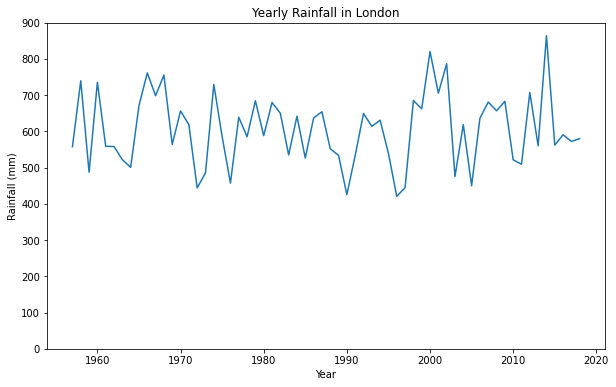

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(query_results11["year"], query_results11["total_rainfall"])   #Fill in the x column first and then the y column.

plt.title('Yearly Rainfall in London')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.yticks(np.arange(0,1000,100))
plt.savefig("rain-graph")

C)  What do we learn from this graph?

*The amount of sun per day seems to be consistent throughout each year and is slightly starting to increase during the summer.*

---

# QUESTION 12



Select all the rows where the T_low and T_high are within 4.5 degrees celsius of each other.  Show the year, month, t_low, and t_high.


Double-click __here__ to see what the solution looks like.

<!--

|    |   year |   month |   t_low |   t_high |
|---:|-------:|--------:|--------:|---------:|
|  0 |   1966 |       1 |     1   |      5.3 |
|  1 |   1968 |      12 |     1   |      5.4 |
|  2 |   1986 |       2 |    -2.7 |      1.7 |
|  3 |   1996 |       1 |     3.1 |      7.2 |
|  4 |   2000 |      12 |     4.6 |      9   |
|  5 |   2002 |      12 |     5.2 |      9   |
|  6 |   2013 |       1 |     2   |      6.5 |


-->

In [ ]:
sql_statement12 = """
                    SELECT year, month, t_low, t_high
                    FROM weather
                    WHERE t_high - t_low <= 4.5
                 """

query_results12 = pd.read_sql_query(sql_statement12, conn)

query_results12

,year,month,t_low,t_high
0,1966,1,1.0,5.3
1,1968,12,1.0,5.4
2,1986,2,-2.7,1.7
3,1996,1,3.1,7.2
4,2000,12,4.6,9.0
5,2002,12,5.2,9.0
6,2013,1,2.0,6.5


---

# QUESTION 13



*Without hardcoding*, select only the years and months that are within 3 degrees celsius of the minimum temperature in the DB.  
 

Double-click __here__ to see what the solution looks like.

<!--

|    |   year |   month |   t_low |
|---:|-------:|--------:|--------:|
|  0 |   1963 |       1 |    -4.6 |
|  1 |   1963 |       2 |    -2.2 |
|  2 |   1979 |       1 |    -2.6 |
|  3 |   1985 |       1 |    -1.8 |
|  4 |   1986 |       2 |    -2.7 |


-->

In [ ]:
sql_statement13 = """
                    SELECT year, month, t_low
                    FROM weather 
                    WHERE t_low - (SELECT MIN(t_low)
                                   FROM weather) 
                 """

query_results13 = pd.read_sql_query(sql_statement13, conn)

query_results13

,year,month,t_low
0,1957,1,2.7
1,1957,2,2.9
2,1957,3,5.7
3,1957,4,5.2
4,1957,5,6.5
...,...,...,...
742,2018,12,5.2
743,2019,1,2.0
744,2019,2,3.3
745,2019,3,5.8


---

# QUESTION 14

Like us, the summer months in London are June, July, and August.

List all years where the average high temperature during that year's summer months is greater than the average summer t_high across all years.  

List the average/max/min high temperature for the summer in those years.

Double-click __here__ to see what the solution looks like.

<!--

|    |   year |   AVG(t_high) |   MAX(t_high) |   MIN(t_high) |
|---:|-------:|--------------:|--------------:|--------------:|
|  0 |   1957 |       22.4    |          23.6 |          21.1 |
|  1 |   1959 |       23.6667 |          24.7 |          22.1 |
|  2 |   1970 |       22.4    |          23.6 |          21.3 |
|  3 |   1973 |       22.3333 |          23.7 |          21.4 |
|  4 |   1975 |       23.9333 |          25.9 |          21.8 |
|  5 |   1976 |       25.7333 |          26.6 |          25.1 |
|  6 |   1983 |       24.3    |          27.6 |          20.8 |
|  7 |   1984 |       23.3    |          24.4 |          21.3 |
|  8 |   1989 |       24.0333 |          25.8 |          22.1 |
|  9 |   1990 |       23.4    |          26   |          19.5 |
| 10 |   1992 |       22.2333 |          22.5 |          21.7 |
| 11 |   1994 |       23.5667 |          26.2 |          21.5 |
| 12 |   1995 |       24.6667 |          27   |          20.7 |
| 13 |   1996 |       23.3667 |          24.2 |          22.8 |
| 14 |   1997 |       23.1667 |          25.8 |          20.2 |
| 15 |   1999 |       22.6667 |          24.9 |          20.3 |
| 16 |   2001 |       22.8667 |          24.3 |          20.8 |
| 17 |   2003 |       24.6333 |          26.4 |          23.3 |
| 18 |   2004 |       22.8667 |          23.8 |          22.1 |
| 19 |   2005 |       23.1    |          23.3 |          22.8 |
| 20 |   2006 |       24.7    |          28.2 |          22.2 |
| 21 |   2009 |       23.1    |          23.9 |          22.4 |
| 22 |   2010 |       23.3667 |          25   |          21.6 |
| 23 |   2013 |       23.8667 |          27   |          20.3 |
| 24 |   2014 |       23.2    |          25.8 |          21.7 |
| 25 |   2015 |       22.7    |          23.7 |          22.2 |
| 26 |   2016 |       23.1333 |          24.7 |          20.7 |
| 27 |   2017 |       23.2667 |          24   |          22   |
| 28 |   2018 |       25.6667 |          28.3 |          24.2 |



-->

In [ ]:
sql_statement14 = """
                  SELECT year, AVG(t_high), MAX(t_high), MIN(t_high)
                  FROM weather
                  WHERE month IN (6,7,8)               
                  GROUP BY year
                  HAVING AVG(t_high) >
                                    (SELECT AVG(t_high)
                                     FROM weather
                                     WHERE month IN (6,7,8))
                  
                 """

query_results14 = pd.read_sql_query(sql_statement14, conn)

query_results14

,year,AVG(t_high),MAX(t_high),MIN(t_high)
0,1957,22.400000,23.6,21.1
1,1959,23.666667,24.7,22.1
2,1970,22.400000,23.6,21.3
3,1973,22.333333,23.7,21.4
4,1975,23.933333,25.9,21.8
5,1976,25.733333,26.6,25.1
6,1983,24.300000,27.6,20.8
7,1984,23.300000,24.4,21.3
8,1989,24.033333,25.8,22.1
9,1990,23.400000,26.0,19.5


---

# QUESTION 15

For each year, show how many months had more hours of sunshine than the average number sunshine hours per month for that year.   

**For example**, consider the year 1957.  The average number of sunshine hours per month in 1957 turns out to be 121.092 hours.  In the table below, we see that April/May/June/July/August all had a number of sunshine hours above this average in 1957.  Thus, there are 5 months in 1957 with more hour of sunshine than the average number sunshine hours per month aross the whole year.

|    |   year |   month |   sun |
|---:|-------:|--------:|------:|
|  0 |   1957 |       1 |  53   |
|  1 |   1957 |       2 |  64.9 |
|  2 |   1957 |       3 |  96.7 |
|  3 |   1957 |       4 | 169.6 |
|  4 |   1957 |       5 | 195   |
|  5 |   1957 |       6 | 284.5 |
|  6 |   1957 |       7 | 152.3 |
|  7 |   1957 |       8 | 154.4 |
|  8 |   1957 |       9 |  88.5 |
|  9 |   1957 |      10 |  85.9 |
| 10 |   1957 |      11 |  67.5 |
| 11 |   1957 |      12 |  40.8 |


### Double-click __here__ to see what the solution looks like because the table above is not the final solution.

<!-- 

|    |   year |   COUNT(*) |
|---:|-------:|-----------:|
|  0 |   1957 |          5 |
|  1 |   1958 |          5 |
|  2 |   1959 |          6 |
|  3 |   1960 |          6 |
|  4 |   1961 |          6 |
|  5 |   1962 |          6 |
|  6 |   1963 |          6 |
|  7 |   1964 |          5 |
|  8 |   1965 |          8 |
|  9 |   1966 |          6 |
| 10 |   1967 |          6 |
| 11 |   1968 |          7 |
| 12 |   1969 |          5 |
| 13 |   1970 |          5 |
| 14 |   1971 |          6 |
| 15 |   1972 |          7 |
| 16 |   1973 |          7 |
| 17 |   1974 |          6 |
| 18 |   1975 |          6 |
| 19 |   1976 |          5 |
| 20 |   1977 |          5 |
| 21 |   1978 |          5 |
| 22 |   1979 |          6 |
| 23 |   1980 |          6 |
| 24 |   1981 |          7 |
| 25 |   1982 |          7 |
| 26 |   1983 |          5 |
| 27 |   1984 |          5 |
| 28 |   1985 |          6 |
| 29 |   1986 |          6 |
| 30 |   1987 |          7 |
| 31 |   1988 |          6 |
| 32 |   1989 |          4 |
| 33 |   1990 |          5 |
| 34 |   1991 |          6 |
| 35 |   1992 |          6 |
| 36 |   1993 |          6 |
| 37 |   1994 |          6 |
| 38 |   1995 |          6 |
| 39 |   1996 |          5 |
| 40 |   1997 |          8 |
| 41 |   1998 |          5 |
| 42 |   1999 |          7 |
| 43 |   2000 |          6 |
| 44 |   2001 |          4 |
| 45 |   2002 |          6 |
| 46 |   2003 |          7 |
| 47 |   2004 |          6 |
| 48 |   2005 |          6 |
| 49 |   2006 |          6 |
| 50 |   2007 |          7 |
| 51 |   2008 |          6 |
| 52 |   2009 |          7 |
| 53 |   2010 |          5 |
| 54 |   2011 |          7 |
| 55 |   2012 |          6 |
| 56 |   2013 |          5 |
| 57 |   2014 |          6 |
| 58 |   2015 |          7 |
| 59 |   2016 |          5 |
| 60 |   2017 |          5 |
| 61 |   2018 |          5 |
| 62 |   2019 |          3 |
-->

### Double-click __here__ for another hint.

<!-- 
You are forced to use a correlated subquery in this example.  Why?  Because the average you need to perform the filtering differs for each row.
-->


In [ ]:
sql_statement15 = """
                  SELECT year, COUNT(*)
                 FROM weather a
                 WHERE sun > (SELECT AVG(sun)
                              FROM weather b
                              WHERE a.year = b.year
                              GROUP BY year)
                 GROUP BY year
                 """

query_results15 = pd.read_sql_query(sql_statement15, conn)

query_results15

,year,COUNT(*)
0,1957,5
1,1958,5
2,1959,6
3,1960,6
4,1961,6
...,...,...
58,2015,7
59,2016,5
60,2017,5
61,2018,5


---

# QUESTION 16

Show how much each month in 2015 differed from the average monthly rainfall amount in 2015.

Rename the new column as ```diff_from_2015_avg_rain```.

Double-click __here__ to see what the solution looks like.

<!-- 

|    |   year |   month |   diff_from_2015_avg_rain |
|---:|-------:|--------:|--------------------------:|
|  0 |   2015 |       1 |                  16.5667  |
|  1 |   2015 |       2 |                  -8.23333 |
|  2 |   2015 |       3 |                 -22.8333  |
|  3 |   2015 |       4 |                 -30.6333  |
|  4 |   2015 |       5 |                  -5.23333 |
|  5 |   2015 |       6 |                 -34.6333  |
|  6 |   2015 |       7 |                  24.9667  |
|  7 |   2015 |       8 |                  69.9667  |
|  8 |   2015 |       9 |                   3.16667 |
|  9 |   2015 |      10 |                  -7.03333 |
| 10 |   2015 |      11 |                   1.36667 |
| 11 |   2015 |      12 |                  -7.43333 |


-->

In [ ]:
sql_statement16 = """
                  SELECT year, month, rain - 
                               (SELECT AVG(rain)
                                FROM weather
                                WHERE year = 2015) AS diff_from_2015_avg_rain
                 FROM weather
                 WHERE year = 2015
                 """

query_results16 = pd.read_sql_query(sql_statement16, conn)

query_results16

,year,month,diff_from_2015_avg_rain
0,2015,1,16.566667
1,2015,2,-8.233333
2,2015,3,-22.833333
3,2015,4,-30.633333
4,2015,5,-5.233333
5,2015,6,-34.633333
6,2015,7,24.966667
7,2015,8,69.966667
8,2015,9,3.166667
9,2015,10,-7.033333


---

### Closing the DB connection.
Let's close the DB connection as we will now work with  a different data set.

In [ ]:
conn.close()